In [1]:
from mat4py import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import t
from distfit import distfit

In [2]:
powerdata_path = r"./data/siemens/hourly_avg_wind_speed_and_power.mat"
pricedata_path = r"./data/siemens/da_price_data_dk1_10AM.csv"

powerdata_dict_list = loadmat(powerdata_path, meta=False)
pricedata = pd.read_csv(pricedata_path)
pricedata = pricedata[['nominal', 'forecast']]
pricedata.dropna(inplace=True)
pricedata['error'] = pricedata['forecast'] - pricedata['nominal']

# Get data out of singleton lists
powerdata_dict = {}
for key in powerdata_dict_list.keys():
    powerdata_dict[key] = [l[0] for l in powerdata_dict_list[key]]
powerdata = pd.DataFrame(powerdata_dict)

In [3]:
np.quantile(pricedata['nominal'], 0.95)

427.19099999999986

In [4]:
nominal_power = 3000
powerdata['error_wp'] = powerdata['hourly_avg_FC_wp'] - powerdata['hourly_avg_RE_wp']
powerdata.describe()

,hourly_avg_FC_wp,hourly_avg_FC_ws,hourly_avg_RE_wp,hourly_avg_RE_ws,range,error_wp
count,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000
mean,896.163907,6.270384,923.437615,6.182965,2209.500000,-27.273708
std,782.007044,1.985531,835.711446,2.363952,1274.933724,500.137763
min,0.000000,2.583333,0.000000,0.822206,2.000000,-2293.569708
25%,288.054950,4.683333,254.446301,4.481194,1105.750000,-287.520312
50%,602.046087,5.933333,663.511977,6.096541,2209.500000,21.788657
75%,1319.599855,7.650000,1386.139293,7.749585,3313.250000,215.513280
max,2999.681977,13.000000,2999.663051,13.327125,4417.000000,2215.457319


## Fit production data

### Fitting

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0840177] [loc=-0.091 scale=1.667]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.610545] [loc=-7.645 scale=7.554]
[distfit] >[pareto    ] [0.00 sec] [RSS: 0.610545] [loc=-1073741831.645 scale=1073741824.000]
[distfit] >[dweibull  ] [0.04 sec] [RSS: 0.0467149] [loc=-0.083 scale=1.236]
[distfit] >[t         ] [0.14 sec] [RSS: 0.0388812] [loc=-0.037 scale=1.143]
[distfit] >[genextreme] [0.17 sec] [RSS: 0.118031] [loc=-0.744 scale=1.745]
[distfit] >[gamma     ] [0.08 sec] [RSS: 0.084611] [loc=-140.896 scale=0.020]
[distfit] >[lognorm   ] [0.18 sec] [RSS: 0.0843918] [loc=-198.140 scale=198.046]
[distfit] >[beta      ] [0.08 sec] [RSS: 0.0840174] [loc=-2863.332 scale=5302.058]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.505342] [loc=-7.645 scale=15.030]
[distfit] >[loggamma  ] [0.09 sec] [RSS: 0.0838503] [loc=-385.252 scale=55.090]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


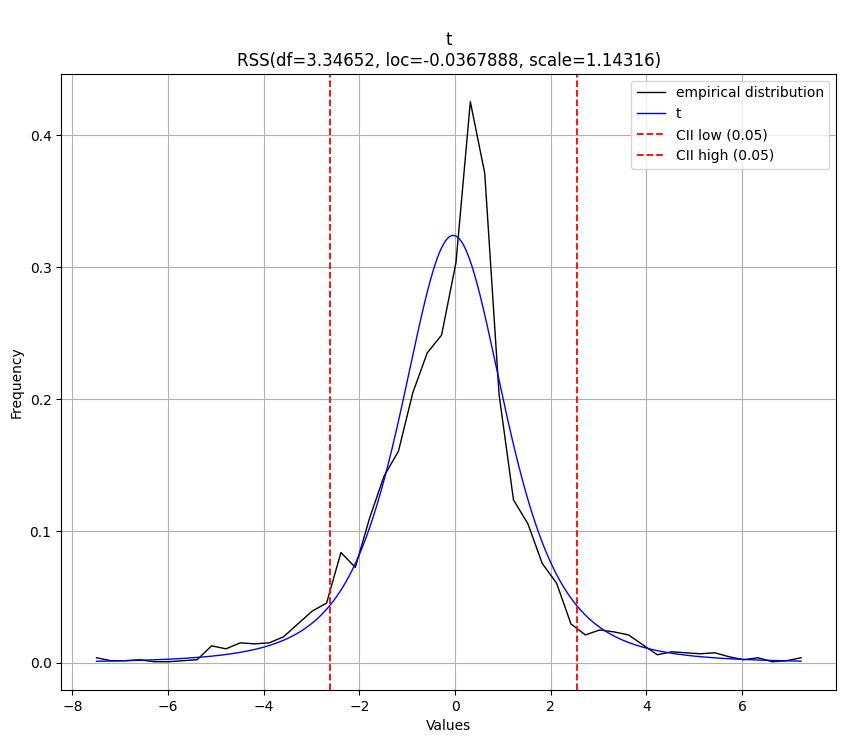

In [15]:

# Initialize model
dist = distfit()

# Find best theoretical distribution for empirical data X
dist.fit_transform(powerdata['error_wp']/3000*10)
fig, ax = dist.plot()
# ax.set_title("")
fig.savefig("prod_fit.pdf")

# Make plot
# fig, ax = dist.plot_summary()
# ax.set_title("")
# ax.set_ylabel("Residuam Sum of Squares (RSS)")
# fig.savefig("plot_summary.pdf") 

### Evaluating

In [151]:
RSS_powerdata = 4.3201e-07
total_variance = np.sum((powerdata['error_wp'] - powerdata['error_wp'].mean())**2)
r_squared = 1 - RSS_powerdata/total_variance
print(r_squared)

0.9999999999999996


### Generating

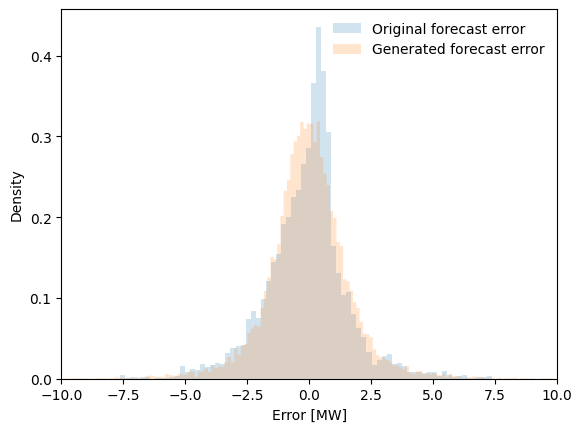

In [10]:
fig, ax = plt.subplots(1, 1)
df = 3.3465
mean, var, skew, kurt = t.stats(df, moments='mvsk')
x = np.linspace(t.ppf(0.01, df),
                t.ppf(0.99, df), 100)
rv = t(df, loc=-11.0358, scale=342.945)

r = t.rvs(df, loc=-0.0367888, scale=1.14316, size=2*8760)
ax.hist(powerdata['error_wp']/3000*10, density=True, bins='auto', histtype='stepfilled', alpha=0.2, label="Original forecast error")
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2, label="Generated forecast error")
ax.set_xlim([-10, 10])
ax.legend(loc='best', frameon=False)
ax.set_xlabel("Error [MW]")
ax.set_ylabel("Density")
fig.savefig("production_forecast_error.pdf")
plt.show()

## Fit price data

### Fitting

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.000322503] [loc=1.171 scale=33.951]
[distfit] >[expon     ] [0.0 sec] [RSS: 0.00101998] [loc=-291.840 scale=293.011]
[distfit] >[pareto    ] [0.01 sec] [RSS: 0.00101998] [loc=-34359738659.840 scale=34359738368.000]
[distfit] >[dweibull  ] [0.20 sec] [RSS: 1.523e-05] [loc=1.480 scale=18.087]
[distfit] >[t         ] [0.45 sec] [RSS: 1.13229e-05] [loc=0.390 scale=12.091]
[distfit] >[genextreme] [0.33 sec] [RSS: 0.00114258] [loc=-291.715 scale=0.583]
[distfit] >[gamma     ] [0.13 sec] [RSS: 0.000326985] [loc=-871.439 scale=1.352]
[distfit] >[lognorm   ] [0.38 sec] [RSS: 0.00116872] [loc=-291.840 scale=1.308]
[distfit] >[beta      ] [0.33 sec] [RSS: 0.000321806] [loc=-2617.739 scale=21766.587]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.000979258] [loc=-291.840 scale=707.600]
[distfit] >[loggamma  ] [0.11 sec] [RSS: 0.000326215] [loc=-10102.213 scale=1369.424]
[distfit] >Compute confidence interval [parametric

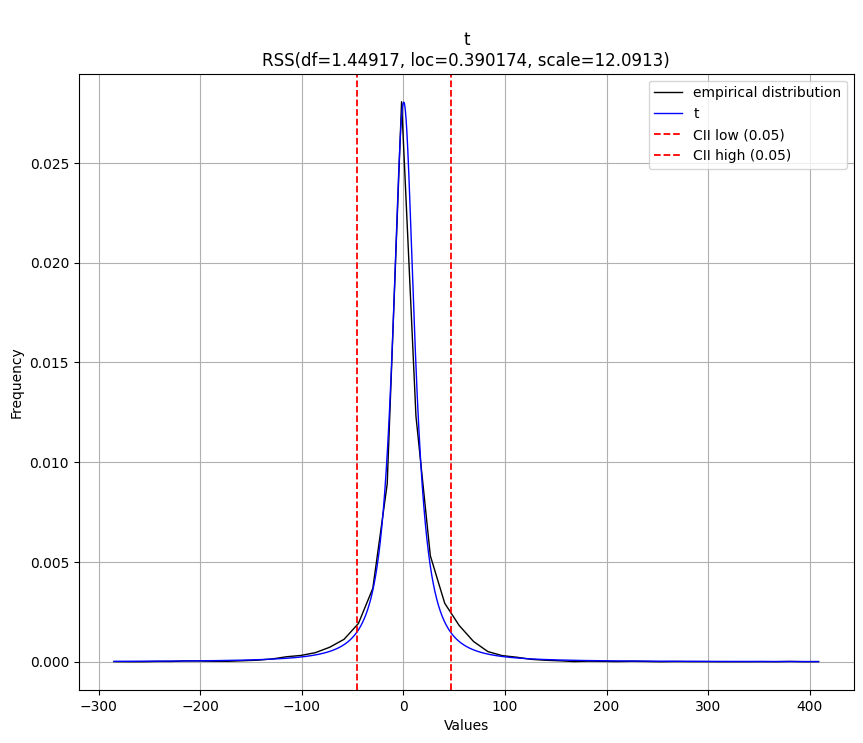

In [14]:

# Initialize model
dist = distfit()

# Find best theoretical distribution for empirical data X
dist.fit_transform(pricedata['error'])
fig, ax = dist.plot()
# ax.set_title("")
fig.savefig("price_fit.pdf")

# # Make plot
# fig, ax = dist.plot_summary()
# ax.set_title("")
# ax.set_ylabel("Residuam Sum of Squares (RSS)")
# fig.savefig("price_summary.pdf") 

### Evaluating

In [72]:
RSS_pricedata = 1.12991e-05
total_variance = np.sum((pricedata['error'] - pricedata['error'].mean())**2)
r_squared = 1 - RSS_pricedata/total_variance
print(r_squared)

0.9999999999993587


### Generating

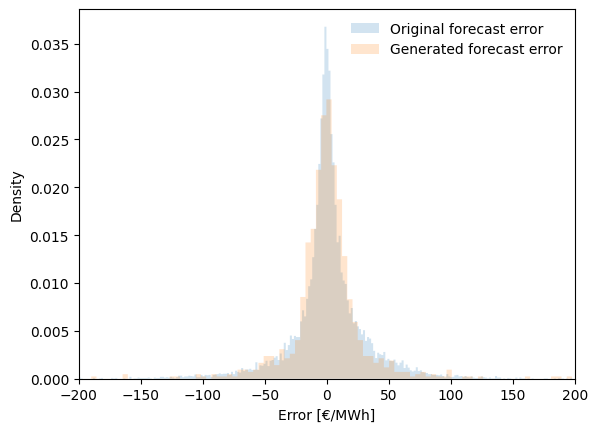

In [16]:
fig, ax = plt.subplots(1, 1)
df = 1.44887
mean, var, skew, kurt = t.stats(df, moments='mvsk')
x = np.linspace(t.ppf(0.01, df),
                t.ppf(0.99, df), 100)
rv = t(df, loc=0.389, scale=12.089)

r = t.rvs(df, loc=0.389, scale=12.089, size=1000)
ax.hist(pricedata['error'], density=True, bins='auto', histtype='stepfilled', alpha=0.2, label="Original forecast error")
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2, label="Generated forecast error")
ax.set_xlim([-200, 200])
ax.set_ylabel("Density")
ax.set_xlabel("Error [€/MWh]")
ax.legend(loc='best', frameon=False)
fig.savefig("price_forecast_error.pdf")
plt.show()

## Format data to use directly

In [139]:
all_data = pd.read_csv('./data/siemens/all_new_data.csv')

In [140]:
DK1_features = pd.read_csv('./data/DK1Generation Forecasts for Wind and Solar_202201010000-202301010000.csv')
DK2_features = pd.read_csv('./data/DK2Generation Forecasts for Wind and Solar_202201010000-202301010000.csv')

DK1_features = DK1_features[['Generation - Solar  [MW] Day Ahead/ BZN|DK1', 'Generation - Wind Offshore  [MW] Day Ahead/ BZN|DK1', 'Generation - Wind Onshore  [MW] Day Ahead/ BZN|DK1']]
DK2_features = DK2_features[['Generation - Wind Offshore  [MW] Day Ahead/ BZN|DK2', 'Generation - Wind Onshore  [MW] Day Ahead/ BZN|DK2']]

In [141]:
start_date = 24*30*4 
end_date = start_date + 5*30*24 + 24*3
offset = 24*30 + 24 * 17

all_data['Offshore DK2'] = np.concatenate([DK2_features.iloc[start_date:start_date+offset, 0], DK2_features.iloc[start_date+offset+24:end_date, 0]])
all_data['Offshore DK1'] = np.concatenate([DK1_features.iloc[start_date:start_date+offset, 1], DK1_features.iloc[start_date+offset+24:end_date, 1]])
all_data['Onshore DK2'] = np.concatenate([DK2_features.iloc[start_date:start_date+offset, 1], DK2_features.iloc[start_date+offset+24:end_date, 1]])
all_data['Onshore DK1'] = np.concatenate([DK1_features.iloc[start_date:start_date+offset, 2], DK1_features.iloc[start_date+offset+24:end_date, 2]])

# # forecast_features_dated.shape
# forecast_dated = np.concatenate([first_period, second_period])

all_data.shape

(3648, 11)

In [142]:
all_data.drop(columns=["time"], inplace=True)

all_data.head()

,forward_RE,forward_FC,UP,DW,production_RE,production_FC,Offshore DK2,Offshore DK1,Onshore DK2,Onshore DK1
0,206.00,186.25,206.00,206.0,291.710900,258.676893,27.0,39.0,33.0,179.0
1,199.70,180.22,200.03,199.7,318.578242,258.676893,25.0,31.0,34.0,178.0
2,197.56,178.88,197.56,160.5,340.562682,249.076211,19.0,32.0,32.0,175.0
3,192.20,173.34,192.20,154.0,370.507194,240.365160,14.0,38.0,31.0,172.0
4,197.43,174.44,197.43,154.0,397.512511,240.365160,8.0,39.0,24.0,146.0


In [143]:
all_data.isnull().values.any()

False

In [144]:
#--------Normalize for stability
all_data["production_RE"] = all_data["production_RE"] / 3000

all_data["production_FC"] = all_data["production_FC"] / 3000

all_data.head()



,forward_RE,forward_FC,UP,DW,production_RE,production_FC,Offshore DK2,Offshore DK1,Onshore DK2,Onshore DK1
0,206.00,186.25,206.00,206.0,0.097237,0.086226,27.0,39.0,33.0,179.0
1,199.70,180.22,200.03,199.7,0.106193,0.086226,25.0,31.0,34.0,178.0
2,197.56,178.88,197.56,160.5,0.113521,0.083025,19.0,32.0,32.0,175.0
3,192.20,173.34,192.20,154.0,0.123502,0.080122,14.0,38.0,31.0,172.0
4,197.43,174.44,197.43,154.0,0.132504,0.080122,8.0,39.0,24.0,146.0


In [145]:
all_data.to_csv("./data/2022_data.csv")

In [1]:
all_data.columns

NameError: name 'all_data' is not defined